In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree, Voronoi, voronoi_plot_2d
import sys
import pathlib

from dijkstra_search import DijkstraSearch

In [8]:

class VoronoiRoadMapPlanner:

    def __init__(self):
        # parameter
        self.N_KNN = 15  # number of edge from one sampled point
        self.MAX_EDGE_LEN = 30.0  # [m] Maximum edge length

    def planning(self, sx, sy, gx, gy, ox, oy, robot_radius):
        obstacle_tree = cKDTree(np.vstack((ox, oy)).T)

        sample_x, sample_y = self.voronoi_sampling(sx, sy, gx, gy, ox, oy)

        plt.plot(ox, oy, ".k")
        plt.plot(sx, sy, "^r")
        plt.plot(gx, gy, "^c")
        plt.grid(True)
        plt.axis("equal")
        plt.plot(sample_x, sample_y, ".b")

        road_map_info = self.generate_road_map_info(
            sample_x, sample_y, robot_radius, obstacle_tree)

        rx, ry = DijkstraSearch(False).search(sx, sy, gx, gy,
                                              sample_x, sample_y,
                                              road_map_info)
        return rx, ry

    def is_collision(self, sx, sy, gx, gy, rr, obstacle_kd_tree):
        x = sx
        y = sy
        dx = gx - sx
        dy = gy - sy
        yaw = math.atan2(gy - sy, gx - sx)
        d = math.hypot(dx, dy)

        if d >= self.MAX_EDGE_LEN:
            return True

        D = rr
        n_step = round(d / D)

        for i in range(n_step):
            dist, _ = obstacle_kd_tree.query([x, y])
            if dist <= rr:
                return True  # collision
            x += D * math.cos(yaw)
            y += D * math.sin(yaw)

        # goal point check
        dist, _ = obstacle_kd_tree.query([gx, gy])
        if dist <= rr:
            return True  # collision

        return False  # OK

    def generate_road_map_info(self, node_x, node_y, rr, obstacle_tree):
        """
        Road map generation

        node_x: [m] x positions of sampled points
        node_y: [m] y positions of sampled points
        rr: Robot Radius[m]
        obstacle_tree: KDTree object of obstacles
        """

        # road_map_info = self.generate_road_map_info(
        # sample_x, sample_y, robot_radius, obstacle_tree)

        road_map = []
        n_sample = len(node_x)
        node_tree = cKDTree(np.vstack((node_x, node_y)).T)

        for (i, ix, iy) in zip(range(n_sample), node_x, node_y):

            dists, indexes = node_tree.query([ix, iy], k=n_sample)

            edge_id = []

            for ii in range(1, len(indexes)):
                nx = node_x[indexes[ii]]
                ny = node_y[indexes[ii]]

                if not self.is_collision(ix, iy, nx, ny, rr, obstacle_tree):
                    edge_id.append(indexes[ii])

                if len(edge_id) >= self.N_KNN:
                    break

            road_map.append(edge_id)

        # self.plot_road_map(road_map, node_x, node_y)

        return road_map

    @staticmethod
    def plot_road_map(road_map, sample_x, sample_y):  # pragma: no cover

        for i, _ in enumerate(road_map):
            for ii in range(len(road_map[i])):
                ind = road_map[i][ii]

                plt.plot([sample_x[i], sample_x[ind]],
                         [sample_y[i], sample_y[ind]], "-k")

    @staticmethod
    def voronoi_sampling(sx, sy, gx, gy, ox, oy):

        sample_x = voronoi_points[..., 0].copy().tolist()
        sample_y = voronoi_points[..., 1].copy().tolist()

        sample_x.append(sx)
        sample_y.append(sy)
        sample_x.append(gx)
        sample_y.append(gy)

        return sample_x, sample_y

In [11]:
obstacles = np.array([
[0.443385, 5.25884]                                                                                                                                                                                                                           
,[0.443385, 5.36982]                                                                                                                                                                                                                           
,[0.443385, 5.4808]                                                                                                                                                                                                                            
,[0.443385, 5.59178]                                                                                                                                                                                                                           
,[0.443385, 5.70276]                                                                                                                                                                                                                           
,[0.443385, 5.81374]                                                                                                                                                                                                                           
,[0.555259, 5.81374]                                                                                                                                                                                                                           
,[0.667132, 5.81374]                                                                                                                                                                                                                           
,[0.779006, 5.81374]                                                                                                                                                                                                                           
,[0.89088, 5.81374]                                                                                                                                                                                                                            
,[1.00275, 5.81374]                                                                                                                                                                                                                            
,[1.00275, 5.70276]                                                                                                                                                                                                                            
,[1.00275, 5.59178]                                                                                                                                                                                                                            
,[1.00275, 5.4808]                                                                                                                                                                                                                             
,[1.00275, 5.36982]                                                                                                                                                                                                                            
,[1.00275, 5.25884]                                                                                                                                                                                                                            
,[0.89088, 5.25884]                                                                                                                                                                                                                            
,[0.779006, 5.25884]                                                                                                                                                                                                                           
,[0.667133, 5.25884]                                                                                                                                                                                                                           
,[0.555259, 5.25884]                                                                                                                                                                                                                           
,[-6.87527, 3.65256]                                                                                                                                                                                                                           
,[-6.87527, 3.82434]                                                                                                                                                                                                                           
,[-6.87527, 3.99612]                                                                                                                                                                                                                           
,[-6.87527, 4.1679]                                                                                                                                                                                                                            
,[-6.87527, 4.33969]                                                                                                                                                                                                                           
,[-6.87527, 4.51147]                                                                                                                                                                                                                           
,[-6.7117, 4.51147]                                                                                                                                                                                                                            
,[-6.54814, 4.51147]                                                                                                                                                                                                                           
,[-6.38457, 4.51147]                                                                                                                                                                                                                           
,[-6.22101, 4.51147]                                                                                                                                                                                                                           
,[-6.05744, 4.51147]                                                                                                                                                                                                                           
,[-6.05744, 4.33969]                                                                                                                                                                                                                           
,[-6.05744, 4.1679]                                                                                                                                                                                                                            
,[-6.05744, 3.99612]                                                                                                                                                                                                                           
,[-6.05744, 3.82434]                                                                                                                                                                                                                           
,[-6.05744, 3.65256]                                                                                                                                                                                                                           
,[-6.22101, 3.65256]                                                                                                                                                                                                                           
,[-6.38457, 3.65256]                                                                                                                                                                                                                           
,[-6.54814, 3.65256]                                                                                                                                                                                                                           
,[-6.7117, 3.65256]                                                                                                                                                                                                                            
,[-7.32008, -3.17219]                                                                                                                                                                                                                          
,[-7.32008, -3.03595]                                                                                                                                                                                                                          
,[-7.32008, -2.89971]                                                                                                                                                                                                                          
,[-7.32008, -2.76348]                                                                                                                                                                                                                          
,[-7.32008, -2.62724]                                                                                                                                                                                                                          
,[-7.32008, -2.491]                                                                                                                                                                                                                            
,[-7.17023, -2.491]                                                                                                                                                                                                                            
,[-7.02038, -2.491]                                                                                                                                                                                                                            
,[-6.87053, -2.491]
,[-6.72068, -2.491]
,[-6.57083, -2.491]
,[-6.57083, -2.62724]
,[-6.57083, -2.76348]
,[-6.57083, -2.89971]
,[-6.57083, -3.03595]
,[-6.57083, -3.17219]
,[-6.72068, -3.17219]
,[-6.87053, -3.17219]
,[-7.02038, -3.17219]
,[-7.17023, -3.17219]
,[2.85917, 4.05833]
,[2.85917, 4.16227]
,[2.85917, 4.2662]
,[2.85917, 4.37014]
,[2.85917, 4.47408]
,[2.85917, 4.57802]
,[2.96238, 4.57802]
,[3.06559, 4.57802]
,[3.1688, 4.57802]
,[3.27201, 4.57802]
,[3.37522, 4.57802]
,[3.37522, 4.47408]
,[3.37522, 4.37014]
,[3.37522, 4.2662]
,[3.37522, 4.16227]
,[3.37522, 4.05833]
,[3.27201, 4.05833]
,[3.1688, 4.05833]
,[3.06559, 4.05833]
,[2.96238, 4.05833]
,[-5, 8.66]
,[-3, 8.66]
,[-1, 8.66]
,[1, 8.66]
,[3, 8.66]
,[5, 8.66]
,[6, 6.928]
,[7, 5.196]
,[8, 3.464]
,[9, 1.732]
,[10, 0]
,[9, -1.732]
,[8, -3.464]
,[7, -5.196]
,[6, -6.928]
,[5, -8.66]
,[3, -8.66]
,[1, -8.66]
,[-1, -8.66]
,[-3, -8.66]
,[-5, -8.66]
,[-6, -6.928]
,[-7, -5.196]
,[-8, -3.464]
,[-9, -1.732]
,[-10, 0]
,[-9, 1.732]
,[-8, 3.464]
,[-7, 5.196]
,[-6, 6.928]
])

goal is found!


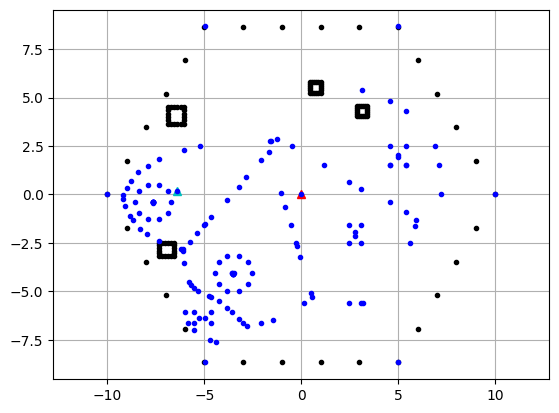

In [14]:
# start and goal position
sx = 0 # [m]
sy = 0  # [m]
gx = -6.42  # [m]
gy = .18  # [m]
robot_size = 0.353 # [m]

ox = obstacles[...,0]
oy = obstacles[...,1]

rx, ry = VoronoiRoadMapPlanner().planning(sx, sy, gx, gy, ox, oy,
                                          robot_size)

assert rx, 'Cannot found path'

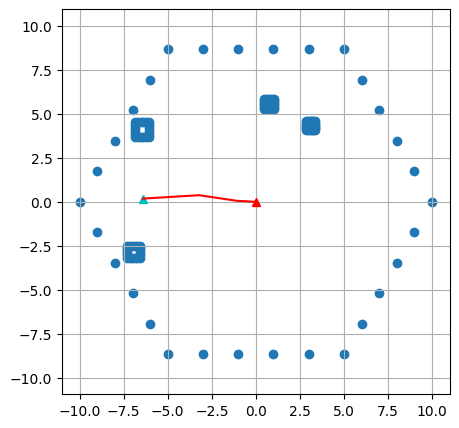

In [15]:
plt.figure(figsize=(5,5))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(obstacles[...,0],obstacles[...,1])
plt.plot(sx, sy, "^r")
plt.plot(gx, gy, "^c")
plt.grid(True)
plt.axis("equal")
plt.plot(rx, ry, "-r")
plt.pause(0.1)
plt.show()

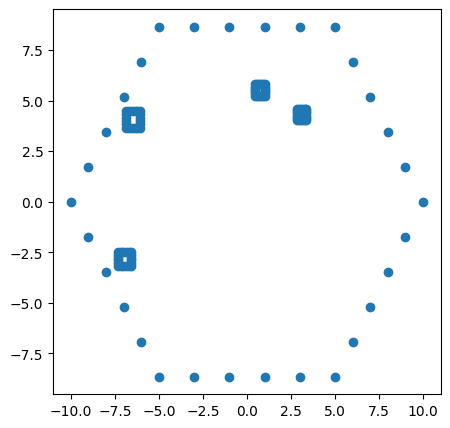

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(obstacles[...,0],obstacles[...,1])

In [19]:
vor = Voronoi(obstacles)

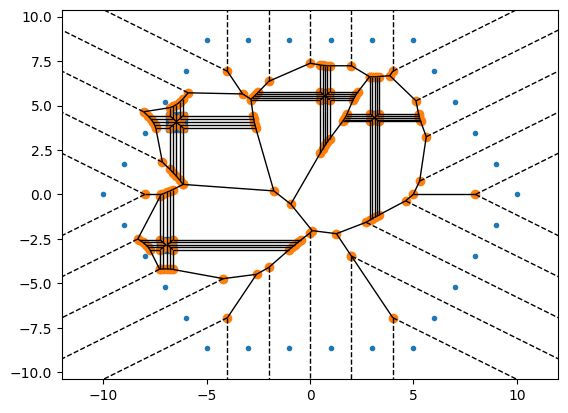

In [26]:
fig = voronoi_plot_2d(vor)
plt.show()

In [79]:
obstalces = np.array([
[0.443385, 5.25884]                                                                                                                                                                                                                           
,[0.443385, 5.36982]                                                                                                                                                                                                                           
,[0.443385, 5.4808]                                                                                                                                                                                                                            
,[0.443385, 5.59178]                                                                                                                                                                                                                           
,[0.443385, 5.70276]                                                                                                                                                                                                                           
,[0.443385, 5.81374]                                                                                                                                                                                                                           
,[0.555259, 5.81374]                                                                                                                                                                                                                           
,[0.667132, 5.81374]                                                                                                                                                                                                                           
,[0.779006, 5.81374]                                                                                                                                                                                                                           
,[0.89088, 5.81374]                                                                                                                                                                                                                            
,[1.00275, 5.81374]                                                                                                                                                                                                                            
,[1.00275, 5.70276]                                                                                                                                                                                                                            
,[1.00275, 5.59178]                                                                                                                                                                                                                            
,[1.00275, 5.4808]                                                                                                                                                                                                                             
,[1.00275, 5.36982]                                                                                                                                                                                                                            
,[1.00275, 5.25884]                                                                                                                                                                                                                            
,[0.89088, 5.25884]                                                                                                                                                                                                                            
,[0.779006, 5.25884]                                                                                                                                                                                                                           
,[0.667133, 5.25884]                                                                                                                                                                                                                           
,[0.555259, 5.25884]                                                                                                                                                                                                                           
,[-6.87527, 3.65256]                                                                                                                                                                                                                           
,[-6.87527, 3.82434]                                                                                                                                                                                                                           
,[-6.87527, 3.99612]                                                                                                                                                                                                                           
,[-6.87527, 4.1679]                                                                                                                                                                                                                            
,[-6.87527, 4.33969]                                                                                                                                                                                                                           
,[-6.87527, 4.51147]                                                                                                                                                                                                                           
,[-6.7117, 4.51147]                                                                                                                                                                                                                            
,[-6.54814, 4.51147]                                                                                                                                                                                                                           
,[-6.38457, 4.51147]                                                                                                                                                                                                                           
,[-6.22101, 4.51147]                                                                                                                                                                                                                           
,[-6.05744, 4.51147]                                                                                                                                                                                                                           
,[-6.05744, 4.33969]                                                                                                                                                                                                                           
,[-6.05744, 4.1679]                                                                                                                                                                                                                            
,[-6.05744, 3.99612]                                                                                                                                                                                                                           
,[-6.05744, 3.82434]                                                                                                                                                                                                                           
,[-6.05744, 3.65256]                                                                                                                                                                                                                           
,[-6.22101, 3.65256]                                                                                                                                                                                                                           
,[-6.38457, 3.65256]                                                                                                                                                                                                                           
,[-6.54814, 3.65256]                                                                                                                                                                                                                           
,[-6.7117, 3.65256]                                                                                                                                                                                                                            
,[-7.32008, -3.17219]                                                                                                                                                                                                                          
,[-7.32008, -3.03595]                                                                                                                                                                                                                          
,[-7.32008, -2.89971]                                                                                                                                                                                                                          
,[-7.32008, -2.76348]                                                                                                                                                                                                                          
,[-7.32008, -2.62724]                                                                                                                                                                                                                          
,[-7.32008, -2.491]                                                                                                                                                                                                                            
,[-7.17023, -2.491]                                                                                                                                                                                                                            
,[-7.02038, -2.491]                                                                                                                                                                                                                            
,[-6.87053, -2.491]
,[-6.72068, -2.491]
,[-6.57083, -2.491]
,[-6.57083, -2.62724]
,[-6.57083, -2.76348]
,[-6.57083, -2.89971]
,[-6.57083, -3.03595]
,[-6.57083, -3.17219]
,[-6.72068, -3.17219]
,[-6.87053, -3.17219]
,[-7.02038, -3.17219]
,[-7.17023, -3.17219]
,[2.85917, 4.05833]
,[2.85917, 4.16227]
,[2.85917, 4.2662]
,[2.85917, 4.37014]
,[2.85917, 4.47408]
,[2.85917, 4.57802]
,[2.96238, 4.57802]
,[3.06559, 4.57802]
,[3.1688, 4.57802]
,[3.27201, 4.57802]
,[3.37522, 4.57802]
,[3.37522, 4.47408]
,[3.37522, 4.37014]
,[3.37522, 4.2662]
,[3.37522, 4.16227]
,[3.37522, 4.05833]
,[3.27201, 4.05833]
,[3.1688, 4.05833]
,[3.06559, 4.05833]
,[2.96238, 4.05833]
,[-5, 8.66]
,[-3, 8.66]
,[-1, 8.66]
,[1, 8.66]
,[3, 8.66]
,[5, 8.66]
,[6, 6.928]
,[7, 5.196]
,[8, 3.464]
,[9, 1.732]
,[10, 0]
,[9, -1.732]
,[8, -3.464]
,[7, -5.196]
,[6, -6.928]
,[5, -8.66]
,[3, -8.66]
,[1, -8.66]
,[-1, -8.66]
,[-3, -8.66]
,[-5, -8.66]
,[-6, -6.928]
,[-7, -5.196]
,[-8, -3.464]
,[-9, -1.732]
,[-10, 0]
,[-9, 1.732]
,[-8, 3.464]
,[-7, 5.196]
,[-6, 6.928]
])

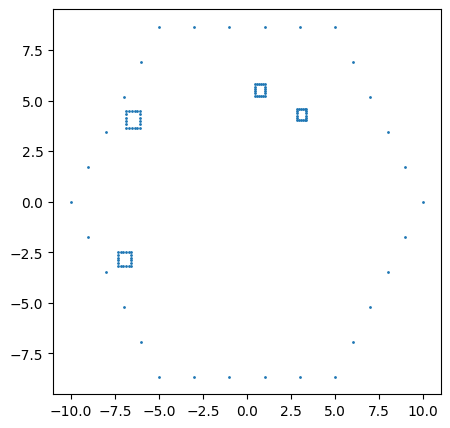

In [80]:
plt.figure(figsize=(5,5))
# plt.xlim(-10,-9)
# plt.ylim(-2,2)
plt.scatter(obstalces[...,0],obstalces[...,1], s=1)

In [27]:
vv = np.array([
    [-4.98667, -8.66667]                                                                                                                                                                                                                          
,[5.01333, -8.66667]                                                                                                                                                                                                                           
,[-6, -6.93333]                                                                                                                                                                                                                                
,[6, -6.93333]                                                                                                                                                                                                                                 
,[-6.98667, -5.2]                                                                                                                                                                                                                              
,[7.01333, -5.2]                                                                                                                                                                                                                               
,[-8, -3.46667]                                                                                                                                                                                                                                
,[8, -3.46667]                                                                                                                                                                                                                                 
,[0.64, -5.92]                                                                                                                                                                                                                                 
,[0.826667, -5.92]                                                                                                                                                                                                                             
,[1.01333, -5.92]                                                                                                                                                                                                                              
,[1.17333, -5.92]                                                                                                                                                                                                                              
,[1.36, -5.92]                                                                                                                                                                                                                                 
,[1.54667, -5.92]                                                                                                                                                                                                                              
,[0.64, -3.14667]                                                                                                                                                                                                                              
,[1.54667, -3.14667]                                                                                                                                                                                                                           
,[0.746667, -3.04]                                                                                                                                                                                                                             
,[1.44, -3.04]                                                                                                                                                                                                                                 
,[0.826667, -2.96]                                                                                                                                                                                                                             
,[1.36, -2.96]                                                                                                                                                                                                                                 
,[3.01333, -5.73333]                                                                                                                                                                                                                           
,[-0.986667, -5.68]                                                                                                                                                                                                                            
,[0.64, -2.64]                                                                                                                                                                                                                                 
,[0.746667, -2.74667]                                                                                                                                                                                                                          
,[0.826667, -2.82667]                                                                                                                                                                                                                          
,[0.853333, -2.85333]                                                                                                                                                                                                                          
,[0.88, -2.90667]                                                                                                                                                                                                                              
,[1.01333, -2.90667]                                                                                                                                                                                                                           
,[1.17333, -2.90667]                                                                                                                                                                                                                           
,[1.28, -2.90667]                                                                                                                                                                                                                              
,[1.33333, -2.85333]                                                                                                                                                                                                                           
,[1.36, -2.82667]                                                                                                                                                                                                                              
,[1.44, -2.74667]                                                                                                                                                                                                                              
,[1.54667, -2.64]                                                                                                                                                                                                                              
,[3.25333, -5.65333]                                                                                                                                                                                                                           
,[3.41333, -5.46667]                                                                                                                                                                                                                           
,[3.41333, -5.44]                                                                                                                                                                                                                              
,[-3.01333, -5.22667]                                                                                                                                                                                                                          
,[-8.98667, -1.73333]                                                                                                                                                                                                                          
,[9.01333, -1.73333]                                                                                                                                                                                                                           
,[-2.98667, -5.2]                                                                                                                                                                                                                              
,[-2.8, -4.85333]                                                                                                                                                                                                                              
,[-6.58667, -0.826667]                                                                                                                                                                                                                         
,[-6.48, -2.58667]                                                                                                                                                                                                                             
,[-7.01333, -2.24]                                                                                                                                                                                                                             
,[4.42667, -3.73333]                                                                                                                                                                                                                           
,[-6.08, -2.8]                                                                                                                                                                                                                                 
,[-6.85333, -0.746667]                                                                                                                                                                                                                         
,[-6.29333, -0.746667]
,[-7.25333, -2.05333]
,[-5.70667, -2.93333]
,[-7.06667, -0.533333]
,[-6.08, -0.533333]
,[-7.70667, -1.6]
,[-7.14667, -0.24]
,[-6, -0.24]
,[-7.89333, -1.36]
,[4.61333, -3.14667]
,[-8.02667, -1.17333]
,[-8.02667, -1.17333]
,[-10, 0]
,[10, 0]
,[-7.06667, 0.0533333]
,[-6.08, 0.0533333]
,[4.64, -3.06667]
,[-3.92, -3.41333]
,[4.66667, -2.96]
,[-3.86667, -3.41333]
,[-6.58667, -0.293333]
,[-6.85333, 0.266667]
,[-6.29333, 0.266667]
,[-6.58667, -0.266667]
,[-6.58667, -0.266667]
,[-6.56, -0.24]
,[-6.58667, -0.24]
,[-6.61333, -0.24]
,[-6.58667, -0.266667]
,[-6.58667, -0.266667]
,[4.69333, -2.88]
,[-6.58667, -0.24]
,[-8.18667, -0.853333]
,[-6.58667, 0.32]
,[-3.6, -3.46667]
,[4.72, -2.74667]
,[-3.36, -3.49333]
,[-4.42667, -1.25333]
,[-4.24, -1.54667]
,[-4.08, -1.84]
,[-3.92, -2.13333]
,[-3.76, -2.45333]
,[-3.6, -2.8]
,[-4.42667, 0.56]
,[-3.6, 0.56]
,[-3.44, -3.2]
,[-3.33333, -3.41333]
,[-4.64, -0.933333]
,[4.74667, -2.66667]
,[-3.12, -3.14667]
,[-3.01333, -3.04]
,[-2.96, -2.96]
,[-4.85333, -0.56]
,[-8.32, -0.56]
,[-2.88, -2.85333]
,[-2.77333, -2.74667]
,[-2.69333, -2.64]
,[-4.26667, 0.72]
,[-3.76, 0.72]
,[-3.6, -2.8]                                                                                                                                                                                                                                  
,[-4.42667, 0.56]
,[-3.6, 0.56]
,[-3.44, -3.2]
,[-3.33333, -3.41333]
,[-4.64, -0.933333]
,[4.74667, -2.66667]
,[-3.12, -3.14667]
,[-3.01333, -3.04]
,[-2.96, -2.96]
,[-4.85333, -0.56]
,[-8.32, -0.56]
,[-2.88, -2.85333]
,[-2.77333, -2.74667]
,[-2.69333, -2.64]
,[-4.26667, 0.72]
,[-3.76, 0.72]
,[-5.14667, -0.0266667]
,[-4.24, 0.746667]
,[-5.25333, 0.266667]
,[-4.10667, 0.88]
,[-3.92, 0.88]
,[-4.08, 0.906667]
,[-8.48, 0]
,[-4.42667, 1.33333]
,[-4.26667, 1.17333]
,[-4.24, 1.14667]
,[-4.10667, 1.01333]
,[-4.08, 0.986667]
,[-4.05333, 0.933333]
,[-4, 0.933333]
,[-3.92, 1.01333]
,[-3.76, 1.17333]
,[-3.6, 1.33333]
,[-8.42667, 0.08]
,[-5.33333, 0.56]
,[-8.32, 0.373333]
,[-5.41333, 0.72]
,[-5.41333, 0.72]
,[-8.98667, 1.73333]
,[9.01333, 1.73333]
,[4.93333, -1.73333]
,[4.93333, -1.70667]
,[-5.46667, 0.88]
,[-5.52, 1.01333]
,[-5.54667, 1.01333]
,[-7.97333, 0.933333]
,[-7.65333, 1.06667]
,[-7.36, 1.17333]
,[-7.65333, 2.24]
,[-7.36, 2.24]
,[-7.68, 1.06667]
,[-7.94667, 0.986667]
,[-7.06667, 1.25333]
,[-8.02667, 1.14667]
,[-8.02667, 1.17333]
,[-7.01333, 1.25333]
,[-8.02667, 1.2]
,[-5.6, 1.17333]
,[-7.94667, 2.34667]
,[-7.06667, 2.34667]
,[-6.8, 1.33333]
,[-8.21333, 1.65333]
,[-6.72, 1.36]
,[-8.29333, 1.94667]
,[-8.16, 2.53333]
,[-6.85333, 2.53333]
,[-5.68, 1.33333]
,[-6.4, 1.41333]
,[-8.34667, 2.32]
,[-6.29333, 1.44]
,[-8.34667, 2.4]
,[-8.32, 2.8]
,[-6.69333, 2.8]
,[-6.08, 1.52]
,[-8.37333, 2.77333]
,[-8.37333, 2.77333]
,[-6, 1.52]
,[-5.81333, 1.57333]
,[-6.64, 3.09333]
,[-8.32, 3.06667]
,[-5.70667, 1.81333]
,[-8.32, 3.38667]
,[-6.69333, 3.38667]
,[-5.54667, 2.08]
,[-8.21333, 3.33333]
,[8, 3.46667]
,[6, 0]
,[-7.84, 2.96]
,[-7.68, 2.93333]
,[-7.62667, 2.90667]
,[-8.16, 3.62667]
,[-6.85333, 3.62667]
,[-7.54667, 2.93333]
,[-8.08, 3.54667]
,[-8.58667, 2.90667]
,[-7.49333, 2.96]
,[-7.46667, 2.98667]
,[-7.44, 2.98667]
,[-7.38667, 3.09333]
,[-7.41333, 3.04]
,[-7.38667, 3.06667]
,[-7.38667, 3.09333]
,[-7.94667, 3.73333]
,[-7.06667, 3.84]
,[-7.38667, 3.17333]
,[-0.293333, 0.56]
,[-7.41333, 3.28]
,[-7.65333, 3.76]
,[-7.44, 3.38667]
,[-7.36, 3.92]
,[-5.28, 2.53333]
,[-7.68, 3.94667]
,[-0.16, 0.72]
,[-8.45333, 3.70667]
,[-8.21333, 3.68]
,[4.98667, 0]
,[-7.38667, 4.13333]
,[-5.06667, 2.8]
,[-7.30667, 4.16]
,[-8.21333, 4.08]
,[-7.94667, 3.84]
,[-7.78667, 3.92]
,[-8.10667, 3.54667]
,[-0.0266667, 0.88]
,[-1.09333, 2.16]
,[-0.933333, 2.02667]
,[-0.773333, 1.89333]
,[-0.586667, 1.73333]
,[-0.426667, 1.6]
,[-0.266667, 1.44]
,[-1.09333, 4.8]
,[-0.266667, 4.8]
,[-0.133333, 1.33333]
,[-6.96, 4.29333]
,[0.0266667, 1.17333]
,[0.213333, 1.01333]
,[0.133333, 1.06667]
,[0.64, 1.12]
,[0.826667, 1.14667]
,[1.01333, 1.17333]
,[1.17333, 1.2]
,[-0.933333, 4.96]
,[-0.426667, 4.96]
,[1.36, 1.25333]
,[-6.98667, 5.2]
,[7.01333, 5.2]
,[1.54667, 1.28]
,[-6.50667, 4.4]
,[-0.56, 5.09333]
,[-0.8, 5.09333]
,[-0.773333, 5.12]
,[-0.586667, 5.12]
,[-1.09333, 5.54667]
,[-0.933333, 5.38667]
,[-0.8, 5.25333]
,[-0.773333, 5.22667]
,[-0.72, 5.17333]
,[-0.64, 5.17333]
,[-0.586667, 5.22667]
,[-0.56, 5.25333]
,[-0.426667, 5.38667]
,[-0.266667, 5.54667]
,[-4.53333, 3.46667]
,[-6, 4.48]
,[4.05333, 1.14667]
,[4, 1.2]
,[-4.42667, 3.6]
,[-5.81333, 4.50667]
,[-5.78667, 4.50667]
,[-10.8, 3.52]
,[-5.52, 4.50667]
,[-4.24, 3.81333]
,[-4.24, 3.81333]
,[3.44, 1.76]
,[-3.6, 3.94667]
,[-4.96, 4.53333]
,[-4.08, 4]
,[-3.76, 4.08]
,[-6, 6.93333]
,[6, 6.93333]
,[-3.92, 4.21333]
,[-3.94667, 4.21333]
,[3.46667, 3.14667]
,[-4.02667, 4.50667]
,[-3.94667, 4.8]
,[-3.92, 4.96]
,[-3.86667, 5.09333]
,[-3.84, 5.25333]
,[-3.73333, 5.6]
,[-3.78667, 5.38667]
,[-3.76, 5.54667]
,[3.2, 4.8]
,[-12.4533, 4.13333]
,[3.14667, 4.96]
,[3.12, 5.09333]
,[3.09333, 5.22667]
,[3.06667, 5.25333]
,[3.06667, 5.25333]
,[-4.98667, 8.66667]
,[-3.54667, 6.13333]
,[-2.98667, 6.50667]
,[-1.09333, 7.09333]
,[-0.986667, 7.09333]
,[-0.933333, 7.09333]
,[-0.773333, 7.09333]
,[-0.586667, 7.09333]
,[-0.426667, 7.09333]
,[-0.266667, 7.09333]
,[1.01333, 6.82667]
,[2.85333, 5.54667]
,[3.01333, 5.38667]
,[3.06667, 5.30667]
,[5.01333, 8.66667]
,[-14.5067, 4.90667]
,[-14.24, 9.36]
,[-33.8133, 13.92]
,[-34.08, 22.9067]
,[-40.3733, 27.0133]
,[-83.1467, 54.3467]
,[305.333, -179.6]
,[307.333, -180.773]
,[-306.32, -177.867]
,[-308.32, -179.04]
,[307.333, -176.133]
,[309.333, -177.307]
,[-308.32, -174.4]
,[-310.32, -175.573]
,[-103.173, 66.96]
,[-112.747, 72.9867]
,[307.333, 176.133]
,[305.333, 179.6]
,[309.333, 177.307]
,[307.333, 180.773]

])

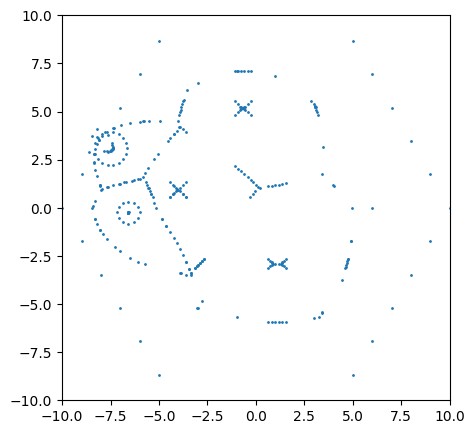

In [30]:
plt.figure(figsize=(5,5))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(vv[...,0],vv[...,1], s=1)